In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('chronic_kidney_disease.csv')
df = pd.DataFrame(data)
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
1,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
2,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
3,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
4,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd


In [3]:
df.shape

(399, 25)

Missing values

In [4]:
#Count missing values
df.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      151
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       86
pot       87
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [5]:
# percentage of missing values for each column
(df.isna().sum()/len(df)*100).round()

age       2.0
bp        3.0
sg       12.0
al       12.0
su       12.0
rbc      38.0
pc       16.0
pcc       1.0
ba        1.0
bgr      11.0
bu        5.0
sc        4.0
sod      22.0
pot      22.0
hemo     13.0
pcv      18.0
wbcc     27.0
rbcc     33.0
htn       1.0
dm        1.0
cad       1.0
appet     0.0
pe        0.0
ane       0.0
class     0.0
dtype: float64

<AxesSubplot:>

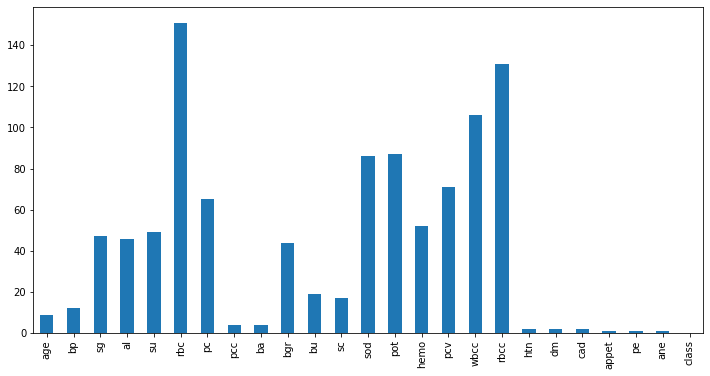

In [6]:
df.isna().sum().plot.bar(figsize=(12,6))

Understanding dataset variables

In [7]:
df['class'].value_counts()

ckd       249
notckd    150
Name: class, dtype: int64

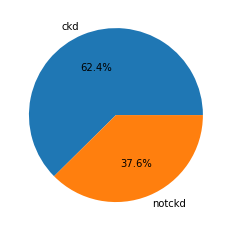

In [8]:
# Proportion of CKD in data
labels=['ckd','notckd']
plt.pie(df['class'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.show() 

In [9]:
# Separating numeracical feature and categorical features
cat_cols = [col for col in df.columns if df[col].dtype=='object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

print(cat_cols)
print(num_cols)

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']
['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']


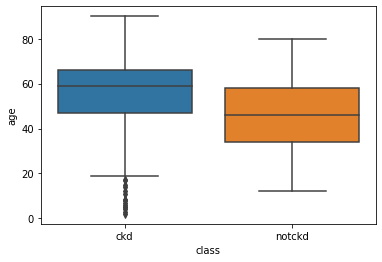

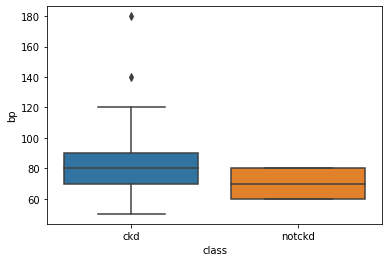

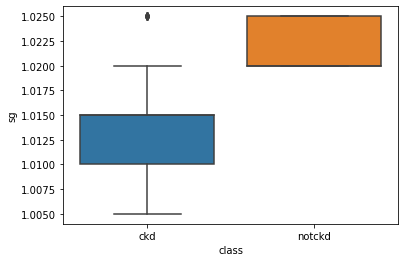

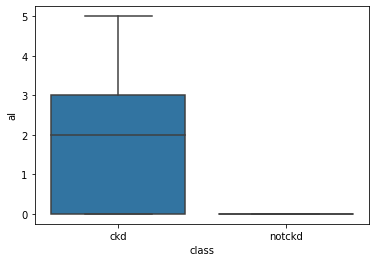

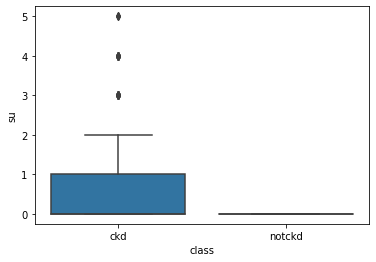

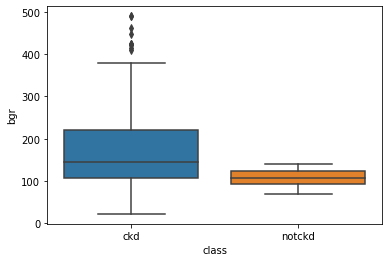

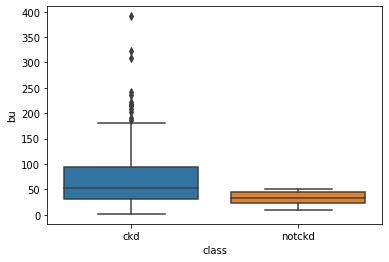

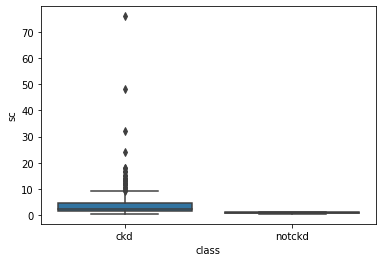

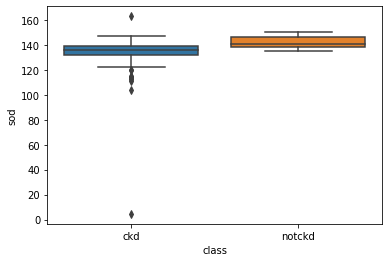

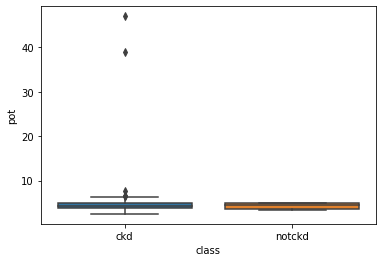

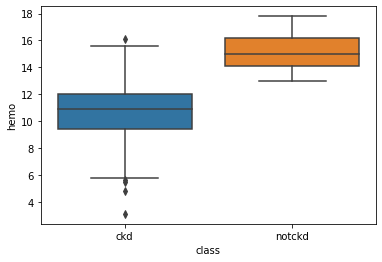

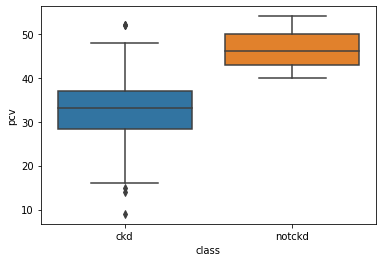

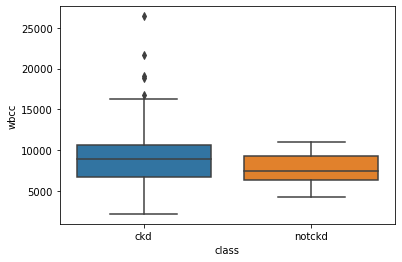

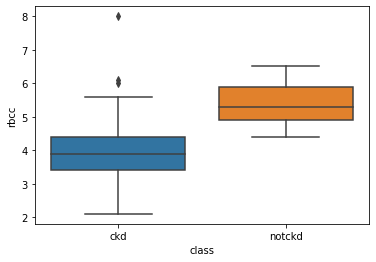

In [10]:
# Visualize numerical features

for col in df[num_cols]:
    sns.boxplot(data=df, x='class', y=col)
    plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sc', ylabel='Density'>

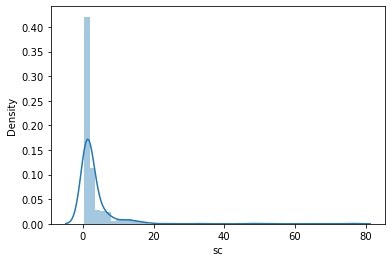

In [11]:
sns.distplot(df.sc)

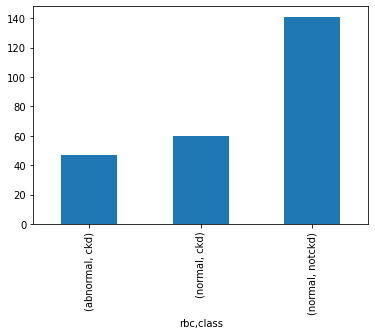

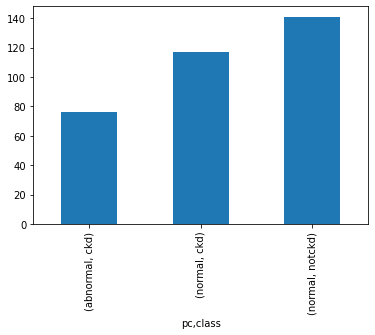

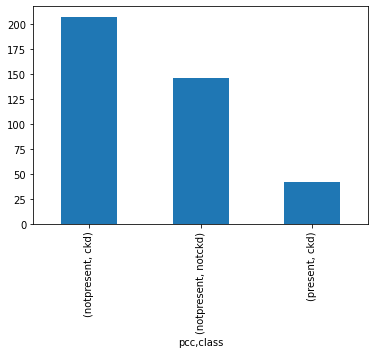

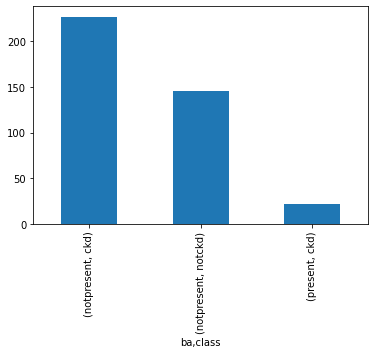

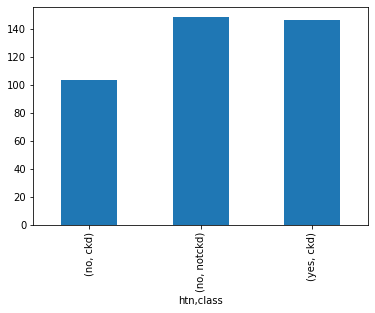

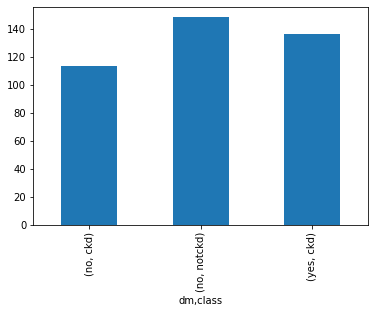

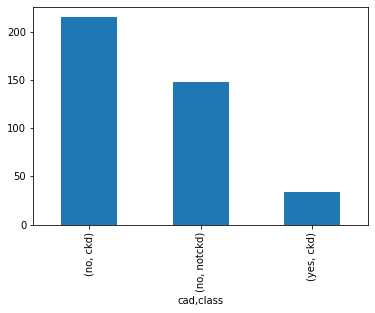

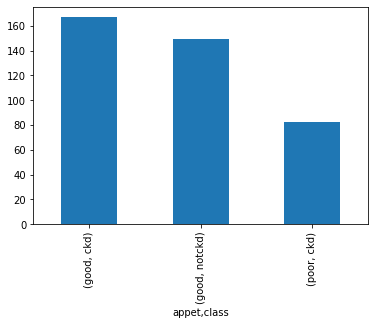

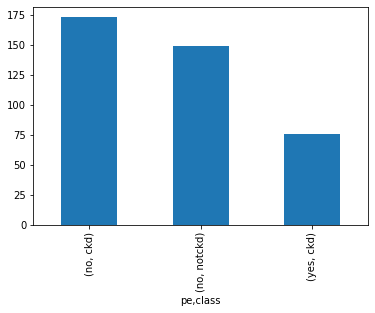

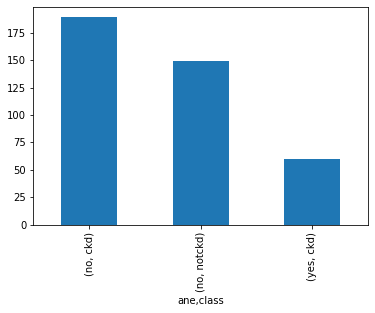

In [12]:
# Visualize categorical features per class

cat_cols2 = [col for col in df[cat_cols] if col!='class']

for col in df[cat_cols2]:
    df.groupby([col, 'class']).size().plot(kind='bar')
    plt.show()

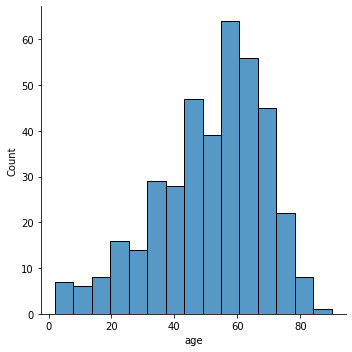

In [13]:
# Age distribution
sns.displot(x='age', data=df)

Imputing data using the mode

In [14]:
# mode as the most frequent value
# My idea is to find the mode but according to the class
# To use it with groupby I will use value_counts in aggregate function (take the one value (index) with the most counts)

df.groupby('class').agg(lambda x:x.value_counts().index[0])

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
class,,,,,,,,,,,,,,,,,,,,,
ckd,65.0,70.0,1.01,0.0,0.0,normal,normal,notpresent,notpresent,93.0,...,10.9,32.0,9800.0,3.9,yes,yes,no,good,no,no
notckd,47.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,15.0,48.0,6700.0,4.5,no,no,no,good,no,no


In [15]:
for col in df.columns:
    df[col]= df.groupby('class')[col].apply(lambda x: x.fillna(x.mode()[0]))

In [16]:
df['age'] = df['age'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     399 non-null    int32  
 1   bp      399 non-null    float64
 2   sg      399 non-null    float64
 3   al      399 non-null    float64
 4   su      399 non-null    float64
 5   rbc     399 non-null    object 
 6   pc      399 non-null    object 
 7   pcc     399 non-null    object 
 8   ba      399 non-null    object 
 9   bgr     399 non-null    float64
 10  bu      399 non-null    float64
 11  sc      399 non-null    float64
 12  sod     399 non-null    float64
 13  pot     399 non-null    float64
 14  hemo    399 non-null    float64
 15  pcv     399 non-null    float64
 16  wbcc    399 non-null    float64
 17  rbcc    399 non-null    float64
 18  htn     399 non-null    object 
 19  dm      399 non-null    object 
 20  cad     399 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [18]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,51.609023,76.315789,1.016654,0.899749,0.395990,142.125313,56.055639,3.027444,136.983709,4.503008,12.368922,37.135338,8723.558897,4.451629
std,17.071753,13.532411,0.005847,1.314769,1.041155,76.779423,49.823321,5.629533,9.274451,2.835222,2.783609,9.178943,2610.588483,0.919548
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,93.000000,26.000000,0.900000,135.000000,4.000000,10.850000,28.000000,6900.000000,3.900000
50%,55.000000,80.000000,1.015000,0.000000,0.000000,114.000000,41.000000,1.300000,136.000000,4.100000,12.100000,37.000000,9400.000000,4.100000
75%,64.000000,80.000000,1.020000,2.000000,0.000000,150.000000,62.500000,2.750000,141.000000,4.800000,14.800000,44.000000,9800.000000,5.100000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


Encoding categorical variables

In [19]:
# Replace class values to 0 and 1 numeric: 1: CKD, 0: not ckd. This is our target.
df=df.replace({'ckd':1, 'notckd':0})

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[cat_cols2] = df[cat_cols2].apply(le.fit_transform)


In [21]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,7,50.0,1.020,4.0,0.0,1,1,0,0,93.0,...,38.0,6000.0,3.9,0,0,0,0,0,0,1
1,62,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.9,0,1,0,1,0,1,1
2,48,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
3,51,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1
4,60,90.0,1.015,3.0,0.0,1,1,0,0,74.0,...,39.0,7800.0,4.4,1,1,0,0,1,0,1


Correlation matrice

<AxesSubplot:>

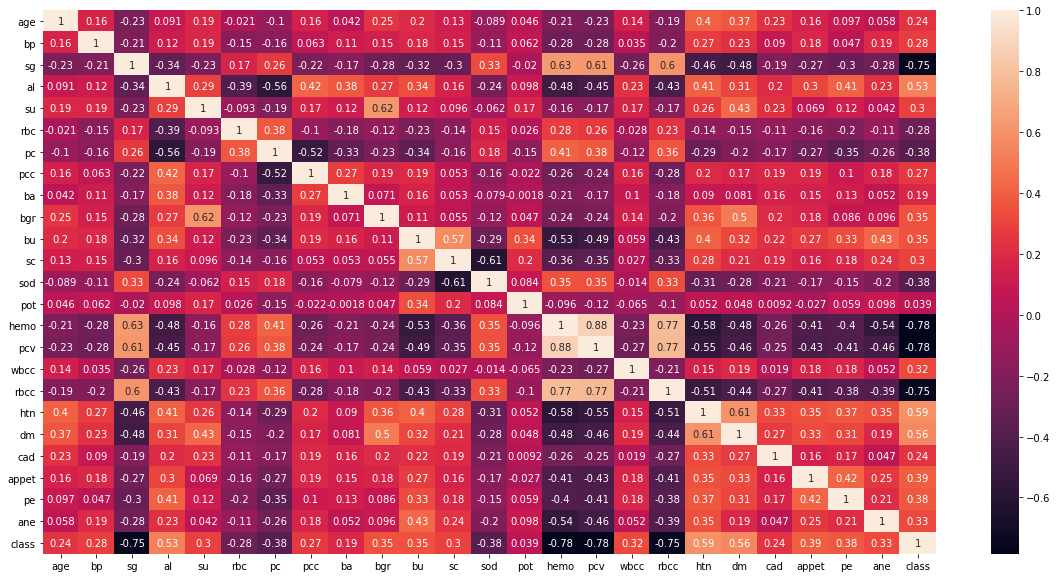

In [22]:
correlation = df.corr()

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlation, annot=True,ax=ax)

Albumin (al), Hypertension (htn) and Diabetes (dm) seem to have an influence on CKD.

<AxesSubplot:xlabel='hemo', ylabel='al'>

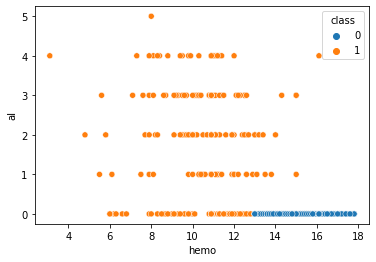

In [23]:
#Vizualize albumine in blood

sns.scatterplot(data=df, x='hemo', y='al', hue='class')

Scaling data

In [24]:
X = df.loc[:, df.columns != 'class']
y = df['class']

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
model_scaler = scaler.fit(X)
X_scaled = model_scaler.transform(X)

Split data into train and test sets

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20) #20% data test set, 80% train set

In [27]:
print("Training data :", X_train.shape)
print("Test data :", X_test.shape)

Training data : (319, 24)
Test data : (80, 24)


Modelisation

In [28]:
#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

#metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [29]:
# Define a function to display metrics
# and append accuracy results to a list
accuracy_list=[]
def metrics_model(model,y_test, y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    print(classification_report(y_test, y_pred))
    model_name=str(model)
    accuracy= metrics.accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

1.Logistic Regression

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



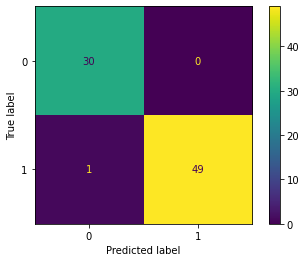

In [30]:
lr = LogisticRegression() # parameters set to default
lr.fit(X_train, y_train) # model training
y_pred = lr.predict(X_test) # predict output

metrics_model(lr,y_test, y_pred)

2.Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



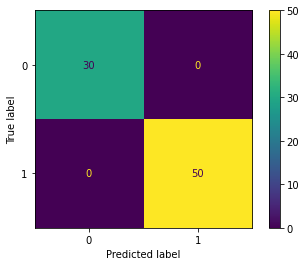

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

metrics_model(rf,y_test, y_pred)

3.Naive Bayes

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



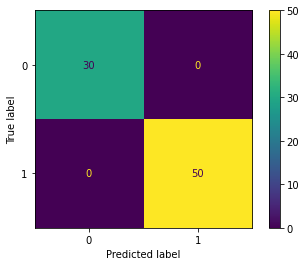

In [32]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

metrics_model(nb,y_test, y_pred)

4.SVM

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



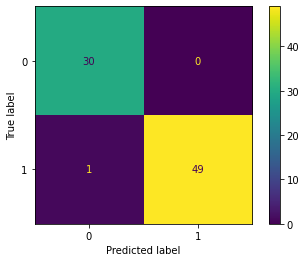

In [33]:
svc = SVC(kernel='rbf') # rbf kernel by default
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

metrics_model(svc,y_test, y_pred)

5.KNN

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.96      0.98        50

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



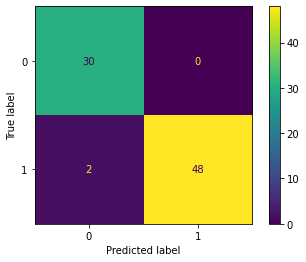

In [34]:
knn = KNeighborsClassifier(n_neighbors=3) # 3 by default
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

metrics_model(knn,y_test, y_pred)

6.ANN

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



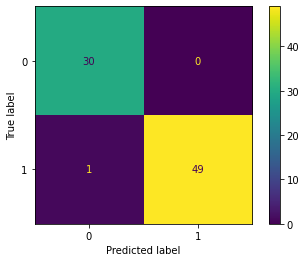

In [35]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)

metrics_model(abc,y_test, y_pred)

Models accuracy score comparison

In [36]:
# Make a datafrma with accuracy scores
model_name = ['LR', 'RF', 'NB', 'SVM', 'KNN','ANN']
accuracy_score = accuracy_list

accuracy_tab = pd.DataFrame({'model_name':model_name,
                            'accuracy_score': accuracy_score},
                            columns=['model_name','accuracy_score'])

print(accuracy_tab)

  model_name  accuracy_score
0         LR          0.9875
1         RF          1.0000
2         NB          1.0000
3        SVM          0.9875
4        KNN          0.9750
5        ANN          0.9875


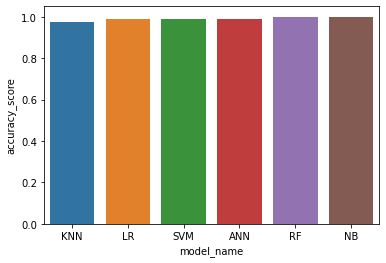

In [37]:
# make barplot and sort bars
p=sns.barplot(x='model_name', y="accuracy_score", data=accuracy_tab,
            order=accuracy_tab.sort_values('accuracy_score').model_name)


 Model for the application

In [38]:
# Take a sample of df to not have all the features
sample_df = pd.DataFrame(data=df, columns=['age','al','htn','class'])

In [39]:
X = sample_df.loc[:, sample_df.columns != 'class']
y = sample_df['class']

In [40]:
# Scale the data
model_scaler = scaler.fit(X)
X_scaled = model_scaler.transform(X)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20)

Search of the best parameters for the model

In [41]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier() 

# Propose choice of parameters
param_grid = {
    'max_depth': list(range(1, 20)),
    'n_estimators': [10, 50, 100, 200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(rfc, param_grid=param_grid, cv= 3)
model_grid = grid.fit(X_train, y_train)
print(model_grid.best_params_)

{'max_depth': 3, 'max_features': 'log2', 'n_estimators': 10}


In [44]:
# Train the model with best params
rfc=RandomForestClassifier(max_depth= 3, max_features='log2', n_estimators= 10) 
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9375


In [45]:
# Save the model as a pickle object
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(rfc, file)